<a href="https://colab.research.google.com/github/SANDRAJACOB1/Naive_Bayes_heart2/blob/main/Naive_Bayes_fourth_project_heart_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import numpy as np
import pandas as pd
df=pd.read_csv('/content/heart (2).csv')
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,HeartDisease,Oldpeak,ST_Slope
0,40,M,ATA,140,289,0,Normal,172,N,0,0.0,Up
1,49,F,NAP,160,180,0,Normal,156,N,1,1.0,Flat
2,37,M,ATA,130,283,0,?,98,N,0,0.0,Up
3,48,F,ASY,138,214,0,?,108,Y,1,1.5,Flat
4,54,M,NAP,150,195,0,Normal,122,N,0,0.0,Up
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1,1.2,Flat
914,68,M,ASY,144,193,1,Normal,141,N,1,3.4,Flat
915,57,M,ASY,130,131,0,Normal,115,Y,1,1.2,Flat
916,57,F,ATA,130,236,0,LVH,174,N,1,0.0,Flat


In [23]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,HeartDisease,Oldpeak,ST_Slope
0,40,M,ATA,140,289,0,Normal,172,N,0,0.0,Up
1,49,F,NAP,160,180,0,Normal,156,N,1,1.0,Flat
2,37,M,ATA,130,283,0,?,98,N,0,0.0,Up
3,48,F,ASY,138,214,0,?,108,Y,1,1.5,Flat
4,54,M,NAP,150,195,0,Normal,122,N,0,0.0,Up


In [24]:
df.tail()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,HeartDisease,Oldpeak,ST_Slope
913,45,M,TA,110,264,0,Normal,132,N,1,1.2,Flat
914,68,M,ASY,144,193,1,Normal,141,N,1,3.4,Flat
915,57,M,ASY,130,131,0,Normal,115,Y,1,1.2,Flat
916,57,F,ATA,130,236,0,LVH,174,N,1,0.0,Flat
917,38,M,NAP,138,175,0,Normal,173,N,0,0.0,Up


In [25]:
df.shape

(918, 12)

In [26]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'HeartDisease', 'Oldpeak',
       'ST_Slope'],
      dtype='object')

In [27]:
#Finding missing values

df.isna().sum()

Age               0
Sex               9
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
HeartDisease      0
Oldpeak           0
ST_Slope          0
dtype: int64

In [28]:
#Filling missing values

df['Sex']=df['Sex'].fillna(df['Sex']).mode()[0]
df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
HeartDisease      0
Oldpeak           0
ST_Slope          0
dtype: int64

In [29]:
df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP          object
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
HeartDisease        int64
Oldpeak           float64
ST_Slope           object
dtype: object

In [30]:
#Encoding

from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()

df['Sex']=lb.fit_transform(df['Sex'])

df['ChestPainType']=lb.fit_transform(df['ChestPainType'])

df['RestingBP']=lb.fit_transform(df['RestingBP'])

df['RestingECG']=lb.fit_transform(df['RestingECG'])

df['ExerciseAngina']=lb.fit_transform(df['ExerciseAngina'])

df['ST_Slope']=lb.fit_transform(df['ST_Slope'])

df.dtypes

Age                 int64
Sex                 int64
ChestPainType       int64
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG          int64
MaxHR               int64
ExerciseAngina      int64
HeartDisease        int64
Oldpeak           float64
ST_Slope            int64
dtype: object

In [31]:
#Splitting Input and Output datas

x=df.drop(['HeartDisease'],axis=1).values
x
#Heartdisease is the output column so we collect all the Input columns by
#dropping the Output column

array([[40. ,  0. ,  1. , ...,  0. ,  0. ,  2. ],
       [49. ,  0. ,  2. , ...,  0. ,  1. ,  1. ],
       [37. ,  0. ,  1. , ...,  0. ,  0. ,  2. ],
       ...,
       [57. ,  0. ,  0. , ...,  1. ,  1.2,  1. ],
       [57. ,  0. ,  1. , ...,  0. ,  0. ,  1. ],
       [38. ,  0. ,  2. , ...,  0. ,  0. ,  2. ]])

In [32]:
y=df.iloc[:,-3].values
y

array([0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,

In [33]:
#Splitting Training data and Testing data

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=1)
x_train

array([[49. ,  0. ,  2. , ...,  1. ,  1.5,  1. ],
       [50. ,  0. ,  0. , ...,  0. ,  2.6,  1. ],
       [57. ,  0. ,  2. , ...,  0. ,  0.2,  2. ],
       ...,
       [63. ,  0. ,  0. , ...,  1. ,  4. ,  2. ],
       [39. ,  0. ,  1. , ...,  1. ,  1. ,  1. ],
       [41. ,  0. ,  1. , ...,  0. ,  0. ,  2. ]])

In [34]:
x_test

array([[58. ,  0. ,  0. , ...,  0. ,  4.4,  0. ],
       [56. ,  0. ,  0. , ...,  1. ,  2. ,  0. ],
       [51. ,  0. ,  0. , ...,  1. ,  4.2,  1. ],
       ...,
       [67. ,  0. ,  3. , ...,  0. ,  0. ,  1. ],
       [52. ,  0. ,  0. , ...,  1. ,  1.5,  1. ],
       [68. ,  0. ,  2. , ...,  1. ,  0. ,  2. ]])

In [35]:
y_train

array([1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0,

In [36]:
y_test

array([1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0])

In [37]:
#Normalization

from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
scalar.fit(x_train)
x_train=scalar.transform(x_train)
x_test=scalar.transform(x_test)
x_train

array([[-0.47492345,  0.        ,  1.25769767, ...,  1.23192819,
         0.59708329, -0.66523458],
       [-0.36745046,  0.        , -0.82602337, ..., -0.81173563,
         1.62728171, -0.66523458],
       [ 0.38486042,  0.        ,  1.25769767, ..., -0.81173563,
        -0.62042395,  1.02283103],
       ...,
       [ 1.02969832,  0.        , -0.82602337, ...,  1.23192819,
         2.93844335,  1.02283103],
       [-1.54965328,  0.        ,  0.21583715, ...,  1.23192819,
         0.12881127, -0.66523458],
       [-1.33470731,  0.        ,  0.21583715, ..., -0.81173563,
        -0.80773275,  1.02283103]])

In [38]:
#Model creation

from sklearn.naive_bayes import BernoulliNB
model=BernoulliNB()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y_pred

array([1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0])

In [39]:
#Performance Evaluation

from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,y_pred)
cm

array([[ 97,  12],
       [ 25, 142]])

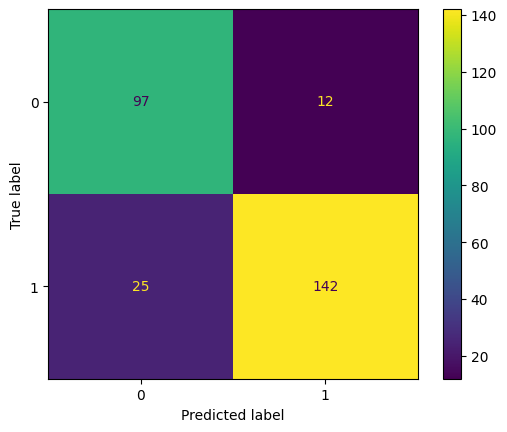

In [40]:
from sklearn.metrics import ConfusionMatrixDisplay
labels=['0','1']
cmd=ConfusionMatrixDisplay(cm,display_labels=labels)
cmd.plot()

In [41]:
score=accuracy_score(y_test,y_pred)
score

0.8659420289855072

In [42]:
from sklearn.metrics import classification_report
report=classification_report(y_test,y_pred)
report

'              precision    recall  f1-score   support\n\n           0       0.80      0.89      0.84       109\n           1       0.92      0.85      0.88       167\n\n    accuracy                           0.87       276\n   macro avg       0.86      0.87      0.86       276\nweighted avg       0.87      0.87      0.87       276\n'